In [108]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [109]:
data=pd.read_csv('https://raw.githubusercontent.com/colaberry/Practical-Data-Science/master/Datasets/Advertising/Advertising.csv', usecols=[1,2,3,4])


In [110]:
data.head()


TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [111]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [112]:
data.describe()


TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000

In [113]:
data.corr()


TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000

In [114]:
sns.set_palette('coolwarm')
data.columns


Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

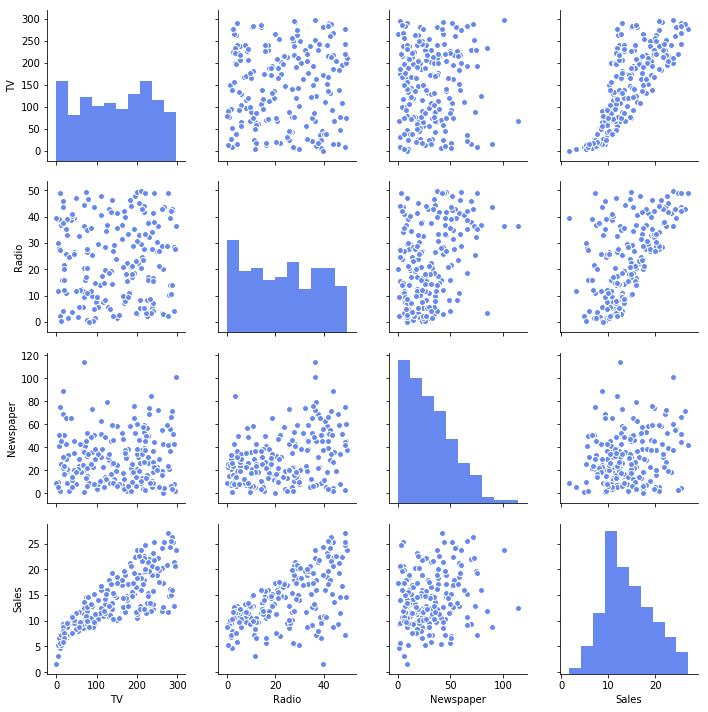

In [115]:
sns.pairplot(data)

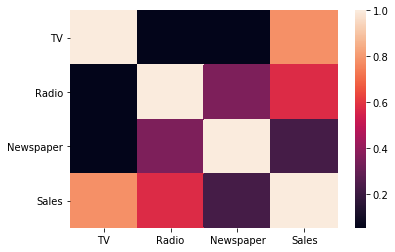

In [116]:
sns.heatmap(data.corr())


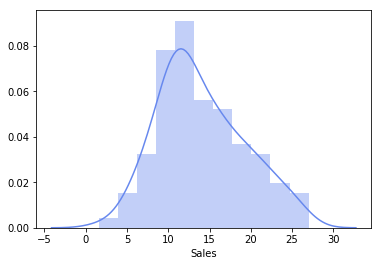

In [117]:
sns.distplot(data['Sales'])


In [118]:
data.columns


Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [119]:
y=data['Sales']
x=data[['TV', 'Radio', 'Newspaper']]


In [120]:
x.head()

TV  Radio  Newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)


In [123]:
x_train.head()


TV  Radio  Newspaper
85   193.2   18.4       65.7
183  287.6   43.0       71.8
127   80.2    0.0        9.2
53   182.6   46.2       58.7
100  222.4    4.3       49.8

# Linear regression

In [124]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [125]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [126]:
lm.coef_


array([ 0.04469599,  0.1875657 , -0.00032275])

In [127]:
lm.intercept_


3.1515267680706494

In [128]:
x_train.columns


Index(['TV', 'Radio', 'Newspaper'], dtype='object')

In [129]:
coef_df=pd.DataFrame(data=lm.coef_,index=x_train.columns,columns=['coeffvalues'])


In [130]:
coef_df

coeffvalues
TV            0.044696
Radio         0.187566
Newspaper    -0.000323

In [131]:
y_predictions=lm.predict(x_test)

Text(0,0.5,'predicted y_test values')

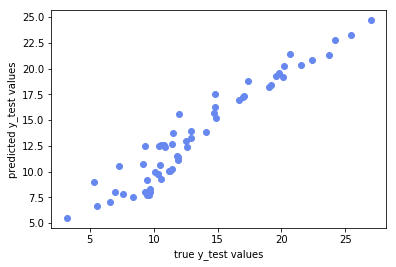

In [132]:
plt.scatter(y_test,y_predictions)
plt.xlabel('true y_test values')
plt.ylabel('predicted y_test values')

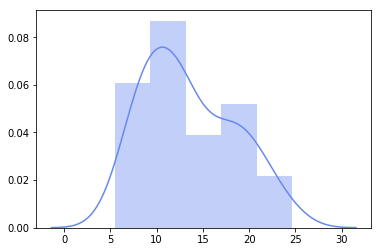

In [133]:
sns.distplot(y_predictions) #if distplot is normally distributed the linear regression is the right model to choose


### Evaluation report

In [134]:
from scipy import stats

In [135]:
p=stats.linregress(y_test,y_predictions)
p

LinregressResult(slope=0.8774575137754109, intercept=1.8187527717745962, rvalue=0.9601602286606081, pvalue=8.33764345364101e-34, stderr=0.033533014193790095)

In [136]:
print(p.rvalue)
r2value=np.sqrt(p.rvalue)
r2value

0.9601602286606081


0.9798776600477266

In [137]:
from sklearn import metrics
print("MAE",metrics.mean_absolute_error(y_test,y_predictions))
r2_value=metrics.explained_variance_score(y_test,y_predictions)
r2_value

MAE 1.2137457736144805


0.9197644826964833

# Naive Bayes

In [138]:
data['Sales']=data['Sales'].astype('long')

In [139]:
data[['TV', 'Radio', 'Newspaper']]=data[['TV', 'Radio', 'Newspaper']].astype('long')

In [140]:
y=data['Sales']
x=data[['TV', 'Radio', 'Newspaper']]

In [141]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)


In [142]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()

In [143]:
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.fit_transform(x_test)

In [144]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB(priors=None)

In [150]:
y_predtest=nb.predict(x_test)
y_predtest

array([ 8, 15, 12, 19,  9,  9, 20, 15, 11, 18,  9, 15, 12, 23, 19,  9, 12,
       11,  9, 22,  9, 19, 25, 25,  9, 12, 15, 10, 12,  7,  8, 18, 11,  8,
       18, 11, 10, 11,  7, 11, 19, 11, 10,  8, 14,  9,  7, 15, 12, 22,  8,
       12, 12, 11, 12,  9, 24,  9, 15, 15])

### Evaluation report

In [146]:
from sklearn.metrics import classification_report,confusion_matrix
cr=classification_report(y_test,y_predtest)
cm=confusion_matrix(y_test,y_predtest)

C:\Users\metuk\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\metuk\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [148]:
print(cr)

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         1
          5       0.00      0.00      0.00         2
          6       0.00      0.00      0.00         1
          7       0.33      0.33      0.33         3
          8       0.00      0.00      0.00         1
          9       0.20      0.25      0.22         8
         10       0.33      0.11      0.17         9
         11       0.25      0.25      0.25         8
         12       0.44      0.80      0.57         5
         14       0.00      0.00      0.00         5
         15       0.00      0.00      0.00         0
         16       0.00      0.00      0.00         1
         17       0.00      0.00      0.00         3
         18       0.00      0.00      0.00         0
         19       0.50      0.50      0.50         4
         20       1.00      0.33      0.50         3
         21       0.00      0.00      0.00         1
         22       0.50      1.00      0.67   

In [149]:
print(cm)

[[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 2 1 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 3 1 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 2 3 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 4 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 1 0 3 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 1 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0

# K-means

In [152]:
from sklearn.cluster import KMeans
clust=[]
for i in range(1,12):
    kmeans=KMeans(n_clusters=i,n_init=11)
    kmeans.fit(x)
    clust.append(kmeans.inertia_)

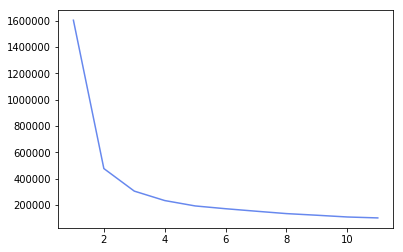

In [153]:
plt.plot(range(1,12),clust)

In [154]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2)
y_pred=kmeans.fit_predict(x)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1])

In [162]:
x[y_pred==0].max()

TV           142
Radio         49
Newspaper    114
dtype: int32

In [166]:
x[y_pred==1].min()

TV           147
Radio          1
Newspaper      0
dtype: int32

In [167]:
x[y_pred==0]

TV  Radio  Newspaper
1     44     39         45
2     17     45         69
5      8     48         75
6     57     32         23
7    120     19         11
8      8      2          1
10    66      5         24
12    23     35         65
13    97      7          7
16    67     36        114
18    69     20         18
22    13     15         49
24    62     12         18
26   142     29         12
29    70     16         40
31   112     17         38
32    97      1         30
34    95      1          7
37    74     49         45
38    43     26         35
44    25     25         43
46    89      9         35
49    66     11         36
51   100      9          3
56     7     28         41
57   136     19         16
60    53      2         21
63   102     29          8
64   131     42         28
65    69      9          0
..   ...    ...        ...
130    0     39          8
132    8     27          2
134   36     38         65
135   48     47          8
136   25     39          9
138   43     25         20
140   73     17         12
143  104      5         34
144   96     14         38
145  140      1          9
148   38     40         11
149   44     25         20
151  121      8         48
155    4     11          5
156   93     43         50
158   11     36         45
159  131     18         34
161   85     35         49
164  117     14          5
166   17     37         21
170   50     11         18
172   19     20         17
182   56      5         29
186  139      2         26
189   18     12         23
190   39     41          5
191   75     10          6
192   17      4         31
195   38      3         13
196   94      4          8

[98 rows x 3 columns]

In [169]:
y[y_pred==0].max()

19

In [172]:
y[y_pred==1].min()

10